In [141]:
import pandas as pd
import numpy as np

import sys
import os

from pathlib import Path
# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, normalize
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Data Loading


In [142]:
# emotions = ['fear', 'contempt', 'happiness', 'anger',
#             'sadness', 'neutral', 'surprise']


# emotions_number = len(emotions)


# print(emotions, emotions_number)

## Extract features

### Load features from df

load

In [143]:
# # features-train-all-v4 - melspectrogram only 128-65
# features_train_df = pd.read_csv('./features/features-train-all-mfcc-v2.csv')
# features_test_df = pd.read_csv('./features/features-test-all-mfcc-v2.csv')
# features_val_df = pd.read_csv('./features/features-val-all-mfcc-v2.csv')
# features_train_df.head()

# features-train-all-v4 - melspectrogram only 128-65
features_train_df = pd.read_csv("./features/features-train-no-uk-mel-v2.csv")
features_test_df = pd.read_csv("./features/features-test-no-uk-mel-v2.csv")
features_val_df = pd.read_csv("./features/features-val-no-uk-mel-v2.csv")
features_uk_test_df = pd.read_csv(
    "./features/features-test-uk-only-mel-v2.csv")
features_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,labels
0,90.357407,25.381262,13.217480,8.188929,8.712362,22.920258,15.890907,12.241099,8.261765,31.130510,...,0.000857,0.002469,0.001963,0.002475,0.002073,0.001551,0.000752,0.000323,0.002240,anger
1,98.479868,27.626112,12.403676,7.132805,11.004840,26.238426,21.339986,13.977914,9.464882,34.198121,...,0.879177,0.716687,0.917389,0.885052,1.110173,1.133701,1.293268,1.077869,1.121075,anger
2,90.357407,25.381262,13.217480,8.188929,8.712362,22.920258,15.890907,12.241099,8.261765,31.130510,...,0.000857,0.002469,0.001963,0.002475,0.002073,0.001551,0.000752,0.000323,0.002240,anger
3,20.002951,3.949590,3.899841,1.271599,1.667388,2.722115,63.597122,25.016373,13.182193,8.177568,...,0.000310,0.000125,0.000081,0.000016,0.000022,0.000204,0.000861,0.002468,0.003056,anger
4,17.137007,20.320030,8.576147,5.224805,1.583428,0.537228,1.285165,1.700830,1.986353,0.626370,...,0.000013,0.000010,0.000007,0.000004,0.000003,0.000003,0.000005,0.000007,0.000014,neutral


In [144]:
emotions = features_train_df.labels.unique()
emotions_number = len(emotions)
print(emotions, emotions_number)

['anger' 'neutral' 'sadness' 'contempt' 'happiness' 'fear' 'surprise'] 7


In [145]:
features_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37172 entries, 0 to 37171
Columns: 4097 entries, 0 to labels
dtypes: float64(4096), object(1)
memory usage: 1.1+ GB


In [146]:
features_test_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
count,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000,...,1.594000e+03,1.594000e+03,1.594000e+03,1.594000e+03,1.594000e+03,1594.000000,1594.000000,1594.000000,1594.000000,1594.000000
mean,349.906058,215.895077,57.311215,29.728711,23.688773,21.786274,22.053254,23.355035,26.097391,27.622281,...,5.789895e-03,5.595780e-03,6.468716e-03,8.908844e-03,1.379310e-02,0.030791,0.054768,0.047598,0.043806,0.076290
std,2063.897798,1161.215388,285.925092,147.905538,116.491527,107.594050,108.298696,114.316840,129.424244,135.950170,...,6.602672e-02,7.613391e-02,6.651306e-02,9.012403e-02,1.965762e-01,0.783735,1.234401,1.004924,0.905626,1.841945
min,0.113131,0.233583,0.091777,0.070308,0.035393,0.027907,0.032145,0.033131,0.029768,0.020027,...,6.611547e-07,7.244483e-07,6.527902e-07,8.991437e-07,9.307003e-07,0.000001,0.000001,0.000002,0.000001,0.000001
25%,6.805339,5.076859,1.836119,1.083058,0.896121,0.779052,0.887055,0.930683,0.955138,1.099464,...,1.474390e-06,1.553846e-06,1.431572e-06,1.987737e-06,1.848238e-06,0.000002,0.000002,0.000003,0.000002,0.000009
50%,25.256513,29.884600,9.936425,5.369187,4.813163,4.120754,4.024556,4.006011,4.770455,4.986985,...,6.632691e-06,6.724581e-06,7.050309e-06,7.735448e-06,7.720478e-06,0.000007,0.000008,0.000008,0.000008,0.000066
75%,77.246081,76.701730,24.208867,12.648365,10.518270,9.716903,9.232369,10.476739,11.400866,11.617737,...,7.355046e-05,7.168104e-05,7.445996e-05,7.362203e-05,6.547127e-05,0.000058,0.000063,0.000071,0.000078,0.000693
max,20279.998000,11400.497000,2798.908700,1423.429400,1132.776900,1034.871500,1059.492700,1121.438000,1305.575400,1351.641100,...,1.755534e+00,2.740840e+00,1.626206e+00,1.810526e+00,5.274726e+00,29.846157,43.953630,34.905990,28.899847,55.519260


In [147]:
x_train = features_train_df.iloc[:, :-1].values
y_train = features_train_df['labels'].values

x_test = features_test_df.iloc[:, :-1].values
y_test = features_test_df['labels'].values

x_val = features_val_df.iloc[:, :-1].values
y_val = features_val_df['labels'].values

x_test_uk = features_uk_test_df.iloc[:, :-1].values
y_test_uk = features_uk_test_df['labels'].values

scale data

In [148]:
all_features_df = pd.concat(
    [features_test_df, features_val_df])
all_features_df.drop(['labels'], axis=1, inplace=True)
all_features = all_features_df.to_numpy()

In [149]:
from sklearn.preprocessing import MinMaxScaler


scaler = StandardScaler()
scaler = scaler.fit(all_features)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

reshape


In [150]:
x_train = np.reshape(x_train, (len(x_train), 64, 64))
x_test = np.reshape(x_test, (len(x_test), 64, 64))
x_val = np.reshape(x_val, (len(x_val), 64, 64))
x_test_uk = np.reshape(x_test_uk, (len(x_test_uk), 64, 64))


print(x_test.shape, y_test.shape, x_train.shape,
      y_train.shape, x_val.shape, y_val.shape)
print(x_test_uk.shape, y_test_uk.shape)

(1594, 64, 64) (1594,) (37172, 64, 64) (37172,) (2390, 64, 64) (2390,)
(26, 64, 64) (26,)


encode labels

In [151]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
y_train_enc = encoder.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_test_enc = encoder.transform(np.array(y_test).reshape(-1, 1)).toarray()
y_val_enc = encoder.transform(np.array(y_val).reshape(-1, 1)).toarray()

y_test_uk_enc = encoder.transform(
    np.array(y_test_uk).reshape(-1, 1)).toarray()

In [152]:
encoder.categories_

[array(['anger', 'contempt', 'fear', 'happiness', 'neutral', 'sadness',
        'surprise'], dtype=object)]

In [153]:
print(
    f'train:\t{x_train.shape, y_train_enc.shape}\nval:\t {x_val.shape, y_val_enc.shape,}\ntest:\t{x_test.shape, y_test_enc.shape}')

train:	((37172, 64, 64), (37172, 7))
val:	 ((2390, 64, 64), (2390, 7))
test:	((1594, 64, 64), (1594, 7))


## Modeling


In [154]:
def print_report(model, history, test_x, test_y):
    print("Accuracy of our model on test data : ",
          model.evaluate(test_x, test_y)[1]*100, "%")

    epochs = history.epoch

    fig, ax = plt.subplots(1, 2)

    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(20, 6)
    ax[0].plot(epochs, train_loss, label='Training Loss')
    ax[0].plot(epochs, test_loss, label='Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[1].plot(epochs, train_acc, label='Training Accuracy')
    ax[1].plot(epochs, test_acc, label='Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")

    plt.show()


def print_confusion_matrix(test, pred, size=(12, 10)):
    cm = confusion_matrix(test, pred)
    plt.figure(figsize=size)
    cm = pd.DataFrame(cm, index=[i for i in encoder.categories_], columns=[
        i for i in encoder.categories_])
    sns.heatmap(cm, linecolor='white', cmap='Blues',
                linewidth=1, annot=True, fmt='')
    plt.title('Confusion Matrix', size=20)
    plt.xlabel('Predicted Labels', size=14)
    plt.ylabel('Actual Labels', size=14)
    plt.show()

In [164]:
import tensorflow as tf
from tensorflow.keras import initializers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import Sequence, to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


data generator:

In [156]:
# https://stackoverflow.com/questions/62916904/failed-copying-input-tensor-from-cpu-to-gpu-in-order-to-run-gatherve-dst-tensor
# Fernando Wittmann

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

### main


In [157]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score


def print_report(model, history, test_x, test_y):
    print("Accuracy of our model on test data : ",
          model.evaluate(test_x, test_y)[1]*100, "%")
    epochs = history.epoch

    fig, ax = plt.subplots(1, 2)

    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(20, 6)
    ax[0].plot(epochs, train_loss, label='Training Loss')
    ax[0].plot(epochs, test_loss, label='Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[1].plot(epochs, train_acc, label='Training Accuracy')
    ax[1].plot(epochs, test_acc, label='Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")

    plt.show()


def print_report_v2(history):
    epochs = history.epoch
    fig, ax = plt.subplots(1, 2)

    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(20, 6)
    ax[0].plot(epochs, train_loss, label='Training Loss')
    ax[0].plot(epochs, test_loss, label='Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[1].plot(epochs, train_acc, label='Training Accuracy')
    ax[1].plot(epochs, test_acc, label='Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")

    plt.show()


def get_metrics(model, y_test, tag):
    y_pred = model.predict(y_test_enc)
    y_pred_decoded = encoder.inverse_transform(y_pred)

    metrics_map = {'model': tag, 'recall': 0,
                   'precision': 0, 'accuracy': 0, 'f1': 0}
    metrics_map['recall'] = recall_score(
        y_true=y_test, y_pred=y_pred_decoded, average='micro')
    metrics_map['precision'] = precision_score(
        y_true=y_test, y_pred=y_pred_decoded, average='micro')
    metrics_map['accuracy'] = accuracy_score(
        y_true=y_test, y_pred=y_pred_decoded)
    metrics_map['f1'] = f1_score(
        y_true=y_test, y_pred=y_pred_decoded, average='micro')

    results = pd.DataFrame(metrics_map, index=[0])

    if (os.path.exists('training_results.csv')):
        saved_metrics = pd.read_csv('training_results.csv')

        results = results.append(saved_metrics)

    results.to_csv('training_results.csv', index=False)


def get_metrics_v2(model, test_data, tag, steps=20):

    # Model Evaluation
    err, acc = model.evaluate_generator(generator=test_data, steps=steps)
    print(err, acc)
    test_data.reset()

    y_pred = model.predict_generator(test_data, verbose=1)
    # encoded prediction e.g 0 1 2 3
    y_pred_indices = np.argmax(y_pred, axis=1)
    labels = (test_data.class_indices)
    labels = dict((v, k) for k, v in labels.items())
    y_pred_decoded = [labels[k] for k in y_pred_indices]
    y_true_decoded = [labels[k] for k in test_data.labels]
    print(len(y_pred_decoded), len(y_true_decoded))

    metrics_map = {'model': tag, 'recall': 0,
                   'precision': 0, 'accuracy': 0, 'f1': 0}

    metrics_map['recall'] = recall_score(
        y_true=y_true_decoded, y_pred=y_pred_decoded, average='micro')
    metrics_map['precision'] = precision_score(
        y_true=y_true_decoded, y_pred=y_pred_decoded, average='micro')
    metrics_map['accuracy'] = accuracy_score(
        y_true=y_true_decoded, y_pred=y_pred_decoded)
    metrics_map['f1'] = f1_score(
        y_true=y_true_decoded, y_pred=y_pred_decoded, average='micro')

    results = pd.DataFrame(metrics_map, index=[0])

    if (os.path.exists('training_results.csv')):
        saved_metrics = pd.read_csv('training_results.csv')

        results = results.append(saved_metrics)

    results.to_csv('training_results.csv', index=False)

    return [y_pred_decoded, y_true_decoded]

In [158]:
# https://towardsdatascience.com/recurrent-neural-nets-for-audio-classification-81cb62327990

In [159]:
from tensorflow.keras.utils import plot_model
# plot_model(model, "mini_resnet.png", show_shapes=True)

In [160]:
train_size=len(x_train)
batch_size=128
epochs=50

In [161]:
initial_learning_rate = 0.001
final_learning_rate = 0.0001
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/epochs)
steps_per_epoch = int(train_size/batch_size)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=steps_per_epoch,
                decay_rate=learning_rate_decay_factor,
                staircase=True)

learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.96
)

In [102]:
# input_shape = (64, 64, 1)

# model = Sequential()
# model.add(Conv2D(8, 3, input_shape=input_shape,
#           padding='same', activation='relu'))  # : f 32 > 8
# model.add(MaxPooling2D())  # A > 4. B
# # : f 32 > 6. 16 (less overfit) > 7. none
# # model.add(Conv2D(16, 3, padding='same', activation='relu'))
# # model.add(AveragePooling2D())  # A > 4. B
# # may remove in future
# # f: 32! > 3. 64 > 5. null! (less overfit)
# model.add(Conv2D(8, 3, padding='same', activation='relu')) # : f 32 > 8
# model.add(MaxPooling2D())  # A > 4. B
# model.add(Flatten())
# # 8192 = 1 sample; 32 time step; 256 features in each step
# model.add(tf.keras.layers.Reshape((8, 256)))  # 32 > 8
# model.add(LSTM(32, input_shape=(8, 256)))  # 256 - 32
# model.add(Dense(7, activation='softmax'))


# optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
# # optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate_schedule)
# model.compile(optimizer=optimizer,
#               loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [162]:
# input_shape = (64, 64, 1)

# model = Sequential()
# model.add(Conv2D(16, 3, strides=4, input_shape=input_shape, activation='relu'))  # : f 32 > 8 > 16
# model.add(MaxPooling2D())  # A > 4. B
# # : f 32 > 6. 16 (less overfit) > 7. none
# # model.add(Conv2D(16, 3, padding='same', activation='relu'))
# # model.add(AveragePooling2D())  # A > 4. B
# # may remove in future
# # f: 32! > 3. 64 > 5. null! (less overfit)
# # model.add(Conv2D(8, 3, padding='same', activation='relu')) # : f 32 > 8
# # model.add(MaxPooling2D())  # A > 4. B
# model.add(Flatten())
# # 8192 = 1 sample; 32 time step; 256 features in each step
# model.add(tf.keras.layers.Reshape((16, 64)))  # 32 > 8
# model.add(LSTM(64, input_shape=(16, 64)))  # 256 - 32
# model.add(Dense(7, activation='softmax'))


# optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
# # optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate_schedule)
# model.compile(optimizer=optimizer,
#               loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 16, 16, 16)        160       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 8, 8, 16)         0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 1024)              0         
                                                                 
 reshape_13 (Reshape)        (None, 16, 64)            0         
                                                                 
 lstm_12 (LSTM)              (None, 64)                33024     
                                                                 
 dense_19 (Dense)            (None, 7)                 455       
                                                     

In [196]:
input_shape = (64, 64, 1)

model = Sequential()
model.add(Conv2D(64, 3, input_shape=input_shape,
          padding='same', activation='relu', kernel_initializer='glorot_normal'))  # : f 32
model.add(AveragePooling2D())  # A > 4. B
# : f 32 > 6. 16 (less overfit) > 7. none
# model.add(Conv2D(16, 3, padding='same', activation='relu'))
# model.add(AveragePooling2D())  # A > 4. B
# may remove in future
# f: 32! > 3. 64 > 5. null! (less overfit)
model.add(Conv2D(32, 3, padding='same', activation='relu', kernel_initializer='glorot_normal'))
model.add(AveragePooling2D())  # A > 4. B
model.add(Flatten())
# 2048 = 1 sample; 32 time step; 64 features in each step
model.add(tf.keras.layers.Reshape((128, 64)))  # 3. 64*64  > 7. 128*64
model.add(LSTM(64, input_shape=(128, 64), kernel_initializer="glorot_normal", recurrent_initializer="orthogonal"))  # 1. 64! > 2. 128  > 7. 128
model.add(Dense(64, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(16, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(7, activation='softmax'))

learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.96
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
# optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate_schedule)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 64, 64, 64)        640       
                                                                 
 average_pooling2d_16 (Avera  (None, 32, 32, 64)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_51 (Conv2D)          (None, 32, 32, 32)        18464     
                                                                 
 average_pooling2d_17 (Avera  (None, 16, 16, 32)       0         
 gePooling2D)                                                    
                                                                 
 flatten_26 (Flatten)        (None, 8192)              0         
                                                                 
 reshape_22 (Reshape)        (None, 128, 64)         

In [166]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4,
                         verbose=0, patience=5, min_lr=0.0000001)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * 0.1
lrs = tf.keras.callbacks.LearningRateScheduler(
    scheduler, verbose=0
)

In [167]:
# def print_lr(scheduler_func, lr, epochs):
#     y_lr = []
#     x_lr = [i+1 for i in range(epochs) ]
#     for i in range(epochs):
#         y_lr.append(scheduler_func(i+1, lr))
#     plt.plot(x_lr, y_lr)
# print_lr(scheduler_func=scheduler, lr=0.001, epochs=50)

In [197]:
history = model.fit(x_train, y_train_enc,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_val, y_val_enc),
                    callbacks=[early_stopping])

# get_metrics(model, test_labels_decoded, '6v3-1d8-dp03-adam-20e')

Epoch 1/50
291/291 [==============================] - 17s 50ms/step - loss: 1.8042 - accuracy: 0.2453 - val_loss: 1.7087 - val_accuracy: 0.2992
Epoch 2/50
291/291 [==============================] - 15s 51ms/step - loss: 1.6818 - accuracy: 0.3098 - val_loss: 1.6227 - val_accuracy: 0.3556
Epoch 3/50
291/291 [==============================] - 15s 51ms/step - loss: 1.6258 - accuracy: 0.3383 - val_loss: 1.6057 - val_accuracy: 0.3724
Epoch 4/50
291/291 [==============================] - 14s 50ms/step - loss: 1.5823 - accuracy: 0.3552 - val_loss: 1.5682 - val_accuracy: 0.3707
Epoch 5/50
291/291 [==============================] - 14s 50ms/step - loss: 1.5514 - accuracy: 0.3676 - val_loss: 1.5569 - val_accuracy: 0.3791
Epoch 6/50
291/291 [==============================] - 14s 50ms/step - loss: 1.5091 - accuracy: 0.3856 - val_loss: 1.4870 - val_accuracy: 0.3992
Epoch 7/50
291/291 [==============================] - 10s 34ms/step - loss: 1.4615 - accuracy: 0.4088 - val_loss: 1.4469 - val_accuracy:

50/50 [==============================] - 0s 7ms/step - loss: 1.3227 - accuracy: 0.4649
Accuracy of our model on test data :  46.48682475090027 %


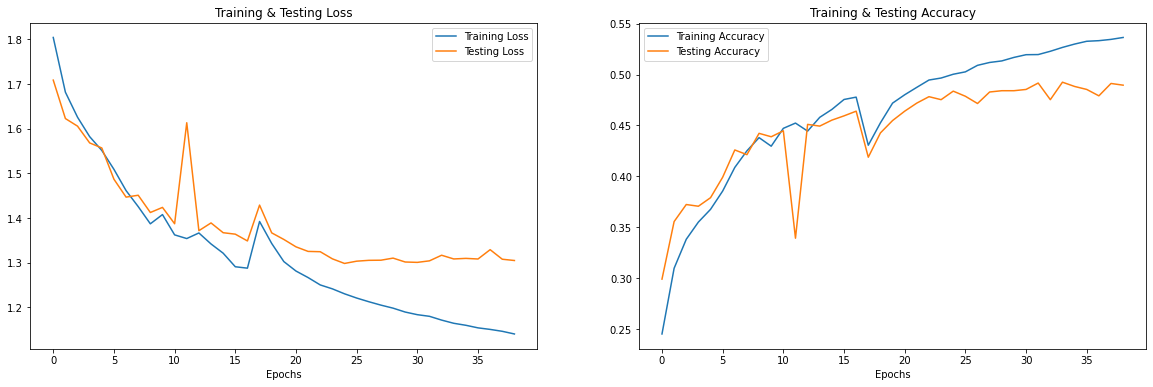

In [198]:
print_report(model, history, x_test, y_test_enc) 

In [170]:
# print_report(model, history, x_test, y_test_enc)

### Predictions

In [171]:
# predicting on test data.
y_pred = model.predict(x_test)
y_pred_uk = model.predict(x_test_uk)
y_pred_decoded = encoder.inverse_transform(y_pred)
y_pred_uk_decoded = encoder.inverse_transform(y_pred_uk)
# y_test_decoded = encoder.inverse_transform(test_labels)

1/1 [==============================] - 0s 30ms/step


In [172]:
def print_confusion_matrix(test, pred, size=(12, 10)):
    cm = confusion_matrix(test, pred)
    plt.figure(figsize=size)
    cm = pd.DataFrame(cm, index=[i for i in encoder.categories_], columns=[
        i for i in encoder.categories_])
    sns.heatmap(cm, linecolor='white', cmap='Blues',
                linewidth=1, annot=True, fmt='')
    plt.title('Confusion Matrix', size=20)
    plt.xlabel('Predicted Labels', size=14)
    plt.ylabel('Actual Labels', size=14)
    plt.show()


def print_confusion_matrix_v2(test, pred, size=(12, 10)):
    cm = confusion_matrix(test, pred)
    plt.figure(figsize=size)
    # cm = pd.DataFrame(cm, index=[i for i in emotions_number], columns=[
    #     i for i in encoder.categories_])
    sns.heatmap(cm, linecolor='white', cmap='Blues',
                linewidth=1, annot=True, fmt='')
    plt.title('Confusion Matrix', size=20)
    plt.xlabel('Predicted Labels', size=14)
    plt.ylabel('Actual Labels', size=14)
    plt.show()

### Confusion matrix + report

In [173]:
y_pred_decoded

array([['anger'],
       ['neutral'],
       ['sadness'],
       ...,
       ['happiness'],
       ['neutral'],
       ['neutral']], dtype=object)

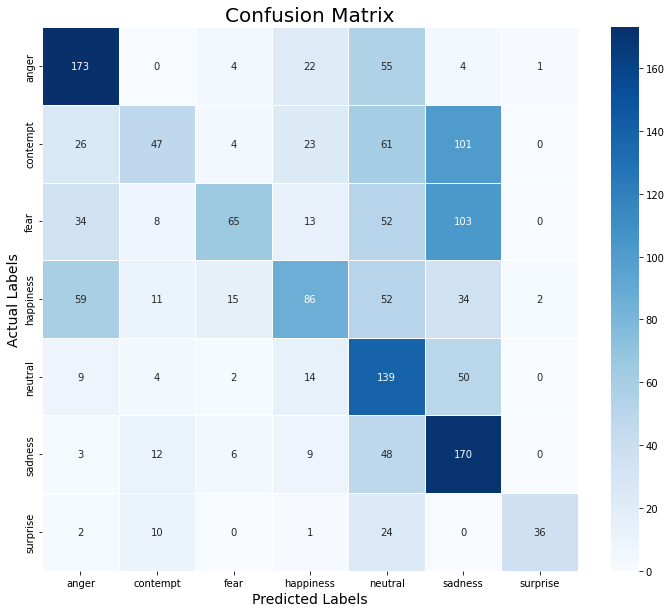

In [174]:
print_confusion_matrix(y_test, y_pred_decoded)

In [175]:
y_pred_decoded.shape

(1594, 1)

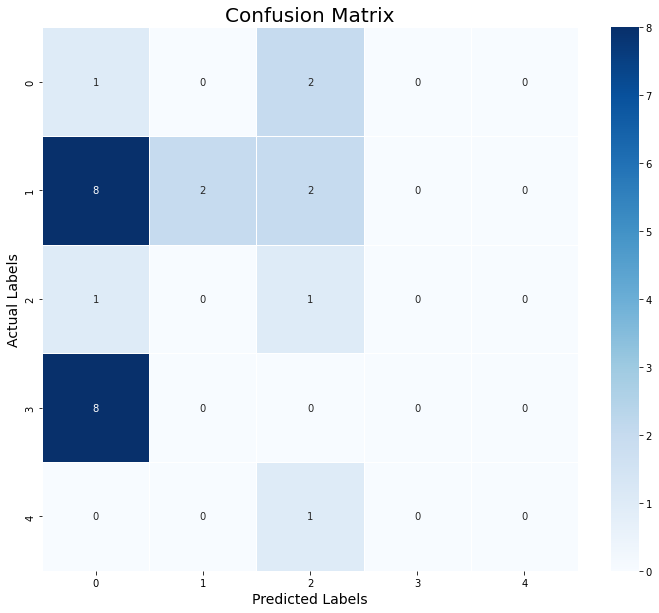

In [176]:
print_confusion_matrix_v2(y_test_uk, y_pred_uk_decoded)

data for the saved model cnn-lstm-i64x64-p109k-oAe50-f079-v1

In [177]:
print(classification_report(y_test, y_pred_decoded))

              precision    recall  f1-score   support

       anger       0.57      0.67      0.61       259
    contempt       0.51      0.18      0.27       262
        fear       0.68      0.24      0.35       275
   happiness       0.51      0.33      0.40       259
     neutral       0.32      0.64      0.43       218
     sadness       0.37      0.69      0.48       248
    surprise       0.92      0.49      0.64        73

    accuracy                           0.45      1594
   macro avg       0.55      0.46      0.45      1594
weighted avg       0.52      0.45      0.43      1594



## Save the model

In [115]:
model_k = './saved_models/cnn-lstm-i64x64-p109k-oAe40-l075-f074-v1.keras'
model_t = './saved_models/cnn-lstm-i64x64-p109k-oAe40-l075-f074-v1.tflite'
model_j = './saved_models/cnn-lstm-i64x64-p109k-oAe40-l075-f074-v1.json'
version = 'v1'

In [116]:
model.save(model_k)

In [117]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter = True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
                                       tf.lite.OpsSet.SELECT_TF_OPS]

tflite_model = converter.convert()

with open(model_t, 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\nicko\AppData\Local\Temp\tmpdi7r03_s\assets


INFO:tensorflow:Assets written to: C:\Users\nicko\AppData\Local\Temp\tmpdi7r03_s\assets


metadata

In [118]:
all_features.std()

32.159162702465686

In [119]:
import os
from tflite_support import flatbuffers
from tflite_support import metadata as _metadata
from tflite_support import metadata_schema_py_generated as _metadata_fb

In [120]:
# Creates model info.
model_meta = _metadata_fb.ModelMetadataT()
model_meta.name = "Speech emotion recognition CNN+LSTM hybrid model"
model_meta.description = ("Identify emotion of human voice")
model_meta.version = version
model_meta.author = "Mykola Nosenko"
model_meta.license = ("Apache License. Version 2.0 "
                      "http://www.apache.org/licenses/LICENSE-2.0.")  # verify later

In [121]:
input_meta = _metadata_fb.TensorMetadataT()

input_meta.name = "mfcc"
input_meta.description = (
    "Input mfcc to be classified. The expected 2d array is 64 x 64".format(160, 160))
input_meta.content = _metadata_fb.ContentT()
input_meta.content.contentProperties = _metadata_fb.FeaturePropertiesT()
input_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
# input_normalization = _metadata_fb.ProcessUnitT()
# input_normalization.optionsType = (
#     _metadata_fb.ProcessUnitOptions.NormalizationOptions)
# input_normalization.options = _metadata_fb.NormalizationOptionsT()
# input_normalization.options.mean = [127.5]
# input_normalization.options.std = [127.5]
# input_meta.processUnits = [input_normalization]
# input_stats = _metadata_fb.StatsT()
# input_stats.max = [255]
# input_stats.min = [0]
# input_meta.stats = input_stats

In [122]:
# Creates output info.
output_meta = _metadata_fb.TensorMetadataT()
output_meta.name = "probability"
output_meta.description = "Probabilities of the 8 labels respectively."
output_meta.content = _metadata_fb.ContentT()
output_meta.content.content_properties = _metadata_fb.FeaturePropertiesT()
output_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_stats = _metadata_fb.StatsT()
output_stats.max = [1.0]
output_stats.min = [0.0]
output_meta.stats = output_stats
label_file = _metadata_fb.AssociatedFileT()
label_file.name = os.path.basename("./emotion_labels.txt")
label_file.description = "Labels for emotions that the model can recognize."
label_file.type = _metadata_fb.AssociatedFileType.TENSOR_AXIS_LABELS
output_meta.associatedFiles = [label_file]

In [123]:
# Creates subgraph info.
subgraph = _metadata_fb.SubGraphMetadataT()
subgraph.inputTensorMetadata = [input_meta]
subgraph.outputTensorMetadata = [output_meta]
model_meta.subgraphMetadata = [subgraph]

b = flatbuffers.Builder(0)
b.Finish(
    model_meta.Pack(b),
    _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
metadata_buf = b.Output()

In [124]:
populator = _metadata.MetadataPopulator.with_model_file(model_t)
populator.load_metadata_buffer(metadata_buf)
populator.load_associated_files(["./emotion_labels.txt"])
populator.populate()

In [125]:
displayer = _metadata.MetadataDisplayer.with_model_file(model_t)
export_json_file = os.path.join(model_j)
json_file = displayer.get_metadata_json()
# Optional: write out the metadata as a json file
with open(export_json_file, "w") as f:
    f.write(json_file)